<a href="https://colab.research.google.com/github/LaraMijic/IS-4487/blob/main/lab6_retailer_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 4487 Lab 6

## Outline

Repeat exercises from Lab 5, but with the *SuperStore Retail Orders* dataset


<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab6_retailer_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Libraries

➡️ Assignment Tasks
- Load any necessary libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Import Data into Dataframe

➡️ Assignment Tasks
- Import data from the SuperStore retail dataset into a dataframe (in GitHub go to Labs > DataSets)
- Describe or profile the dataframe.  
- If your record count doesn't match the source file, then resolve the issue

In [4]:
df = pd.read_csv(r'superstore_retail_orders (1).csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56045 entries, 0 to 56044
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          56045 non-null  int64  
 1   order_date        56013 non-null  object 
 2   order_year_month  56013 non-null  object 
 3   customer_name     56045 non-null  object 
 4   city              55571 non-null  object 
 5   state_province    55571 non-null  object 
 6   quantity          56006 non-null  float64
 7   product_name      56045 non-null  object 
 8   product_line      56045 non-null  object 
 9   product_price     56045 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 4.3+ MB


In [6]:
df.describe()

,order_id,quantity,product_price
count,56045.000000,56006.000000,56045.000000
mean,61668.066340,3.348498,6195.540505
std,7508.229651,422.646565,35784.727716
min,45079.000000,1.000000,2.290000
25%,55644.000000,1.000000,7.950000
50%,61869.000000,1.000000,475.600000
75%,68097.000000,2.000000,914.620000
max,74147.000000,100000.000000,235481.000000


In [7]:
df.head()

,order_id,order_date,order_year_month,customer_name,city,state_province,quantity,product_name,product_line,product_price
0,51188,2021-07-01,2021-07,Audrey Blanco,North Cherylmouth,NEW HAMPSHIRE,3.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99
1,51187,2021-07-01,2021-07,Isaac Allen,Traceyland,WEST VIRGINIA,4.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99
2,51199,2021-07-02,2021-07,Ian Morgan,Dylanberg,SOUTH DAKOTA,5.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99
3,51241,2021-07-04,2021-07,Alexa Bell,Lake Tracytown,WISCONSIN,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99
4,51297,2021-07-08,2021-07,Casey Diaz,Byrdchester,MISSISSIPPI,1.0,"Apple iPhone XR (Yellow, 256 GB) (Includes Ear...",Mobile,649.99


## Prepare Data

➡️ Assignment Tasks
- Convert any numbers into the correct datatype if they are not already numeric
- Convert any character variables in to factors if they are appropriate for that datatype
- Check for outliers.   Remove any outliers that appear to be mistakes
- Remove rows with empty (NULL) values

In [8]:
df['sales_revenue'] = df['product_price'] * df['quantity']

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56045 entries, 0 to 56044
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          56045 non-null  int64  
 1   order_date        56013 non-null  object 
 2   order_year_month  56013 non-null  object 
 3   customer_name     56045 non-null  object 
 4   city              55571 non-null  object 
 5   state_province    55571 non-null  object 
 6   quantity          56006 non-null  float64
 7   product_name      56045 non-null  object 
 8   product_line      56045 non-null  object 
 9   product_price     56045 non-null  float64
 10  sales_revenue     56006 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.7+ MB


In [10]:
df_cleaned = df.dropna()

In [11]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55500 entries, 0 to 56044
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          55500 non-null  int64  
 1   order_date        55500 non-null  object 
 2   order_year_month  55500 non-null  object 
 3   customer_name     55500 non-null  object 
 4   city              55500 non-null  object 
 5   state_province    55500 non-null  object 
 6   quantity          55500 non-null  float64
 7   product_name      55500 non-null  object 
 8   product_line      55500 non-null  object 
 9   product_price     55500 non-null  float64
 10  sales_revenue     55500 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 5.1+ MB


Didn't do too much filtering here, but as I started creating charts below, I found outliers and then removed them. See outlier removal code below.

## Create Basic Charts

➡️ Assignment Tasks
Your target variable is Total Sales (count of sales)
- Create a bar chart
- Create a histogram
- Create a box plot
- Create a scatter plot
Each visualization should bring some insight into the total sales.

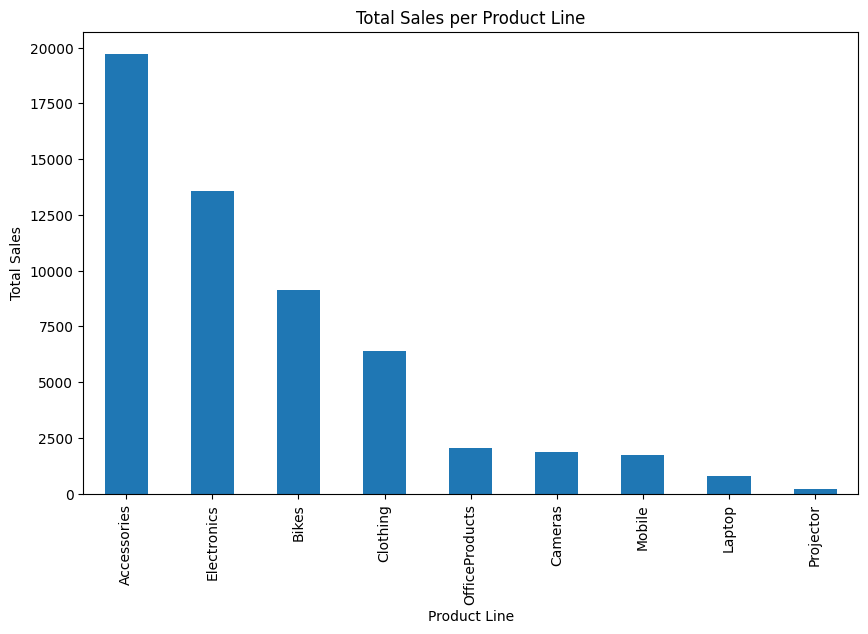

In [12]:
#bar chart

#count of product to find total number of sales
total_sales = df_cleaned['product_line'].value_counts()

# Plotting
plt.figure(figsize=(10,6))
total_sales.plot(kind='bar')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.title('Total Sales per Product Line')
plt.show()

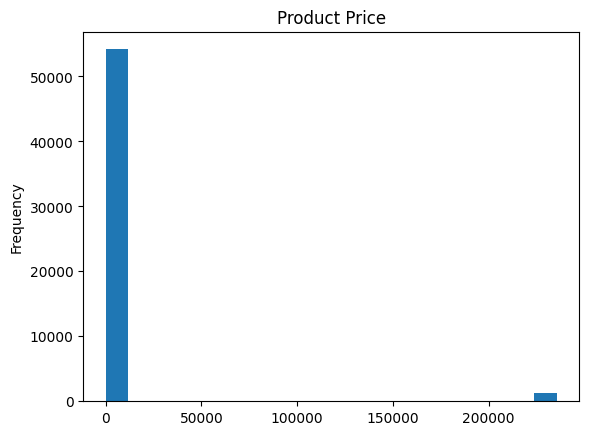

In [13]:
#histogram
hist = df_cleaned['product_price'].plot.hist(bins=20,title='Product Price')

In [14]:
df_price_over_200k = df_cleaned[(df_cleaned['product_price'] > 200000)]

In [15]:
df_price_over_200k.head(20)

,order_id,order_date,order_year_month,customer_name,city,state_province,quantity,product_name,product_line,product_price,sales_revenue
36547,51189,2021-07-02,2021-07,Tabitha Gomez,Lake Katrina,NEW YORK,2.0,"Half-Finger Gloves, L",Clothing,235481.0,470962.0
36548,51316,2021-07-09,2021-07,Bethany Deng,South Melissafort,HAWAII,3.0,"Half-Finger Gloves, L",Clothing,235481.0,706443.0
36549,51390,2021-07-13,2021-07,Deanna Rodriguez,Cunninghamton,UTAH,2.0,"Half-Finger Gloves, L",Clothing,235481.0,470962.0
36550,51428,2021-07-16,2021-07,Margaret He,Port Kevin,OREGON,2.0,"Half-Finger Gloves, L",Clothing,235481.0,470962.0
36551,51578,2021-07-25,2021-07,Gilbert Pal,Fordfort,OREGON,1.0,"Half-Finger Gloves, L",Clothing,235481.0,235481.0
36552,51589,2021-07-26,2021-07,Linda Navarro,Ronaldbury,SOUTH DAKOTA,2.0,"Half-Finger Gloves, L",Clothing,235481.0,470962.0
36553,51654,2021-07-29,2021-07,Luis Simmons,Scottfurt,NEW HAMPSHIRE,2.0,"Half-Finger Gloves, L",Clothing,235481.0,470962.0
36554,51884,2021-08-01,2021-08,Barbara Zhang,Davidbury,PENNSYLVANIA,1.0,"Half-Finger Gloves, L",Clothing,235481.0,235481.0
36555,51990,2021-08-03,2021-08,Caleb Flores,East Tara,VERMONT,3.0,"Half-Finger Gloves, L",Clothing,235481.0,706443.0
36556,52040,2021-08-04,2021-08,Jessica Thomas,Fryeland,SOUTH CAROLINA,2.0,"Half-Finger Gloves, L",Clothing,235481.0,470962.0


In [16]:
df_price_over_200k.tail()

,order_id,order_date,order_year_month,customer_name,city,state_province,quantity,product_name,product_line,product_price,sales_revenue
37874,74013,2022-06-28,2022-06,Brandi Serrano,New Elizabeth,OREGON,2.0,"Half-Finger Gloves, S",Clothing,235481.0,470962.0
37875,74012,2022-06-28,2022-06,Brandon Sharma,Blevinsland,CONNECTICUT,2.0,"Half-Finger Gloves, S",Clothing,235481.0,470962.0
37876,73950,1922-06-28,1922-06,Kurt Deng,West Nicholaston,NORTH DAKOTA,2.0,"Half-Finger Gloves, S",Clothing,235481.0,470962.0
37877,74044,2022-06-29,2022-06,Andre Gonzalez,Bennetttown,MONTANA,2.0,"Half-Finger Gloves, S",Clothing,235481.0,470962.0
37878,74143,2022-06-30,2022-06,Troy Gonzalez,Joneschester,WISCONSIN,2.0,"Half-Finger Gloves, S",Clothing,235481.0,470962.0


In [17]:
df_price_over_200k.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1326 entries, 36547 to 37878
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          1326 non-null   int64  
 1   order_date        1326 non-null   object 
 2   order_year_month  1326 non-null   object 
 3   customer_name     1326 non-null   object 
 4   city              1326 non-null   object 
 5   state_province    1326 non-null   object 
 6   quantity          1326 non-null   float64
 7   product_name      1326 non-null   object 
 8   product_line      1326 non-null   object 
 9   product_price     1326 non-null   float64
 10  sales_revenue     1326 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 156.6+ KB


This product price in the above dataframe looks like an error. It seems unlikely that the product price would be over 200K for half-finger gloves. This also appears to be the only product in the filtered data frame that has a price above 200,000. Therefore, I will filter out products with prices over 200K to give a more accurate representation in the histogram.

In [18]:
df_price_cleaned = df_cleaned[(df_cleaned['product_price'] < 200000)]

In [19]:
df_price_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54174 entries, 0 to 56044
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          54174 non-null  int64  
 1   order_date        54174 non-null  object 
 2   order_year_month  54174 non-null  object 
 3   customer_name     54174 non-null  object 
 4   city              54174 non-null  object 
 5   state_province    54174 non-null  object 
 6   quantity          54174 non-null  float64
 7   product_name      54174 non-null  object 
 8   product_line      54174 non-null  object 
 9   product_price     54174 non-null  float64
 10  sales_revenue     54174 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 5.0+ MB


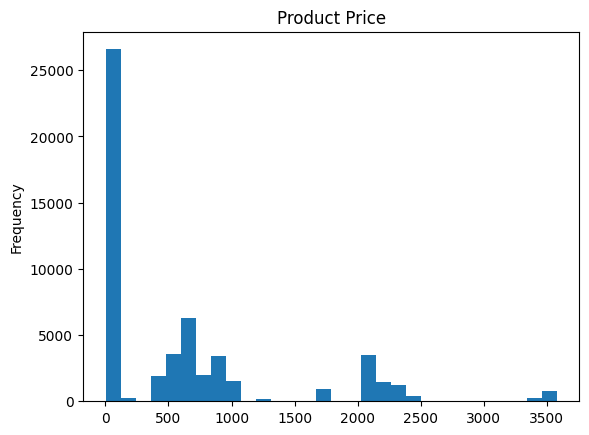

In [20]:
#histogram
hist = df_price_cleaned['product_price'].plot.hist(bins=30,title='Product Price')

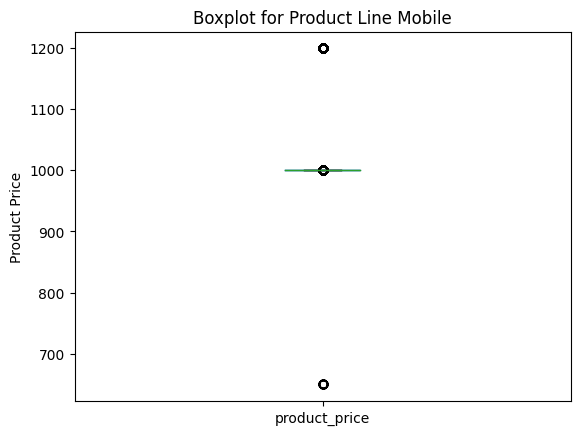

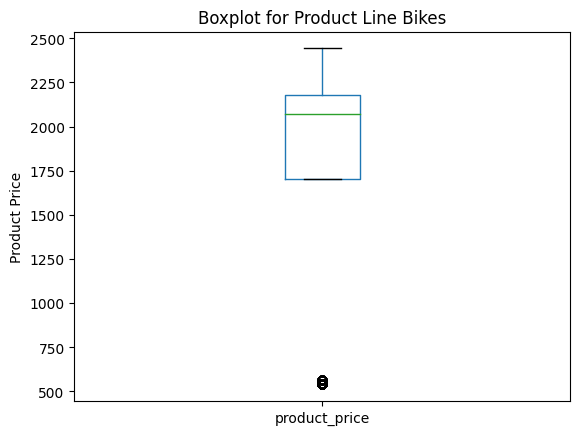

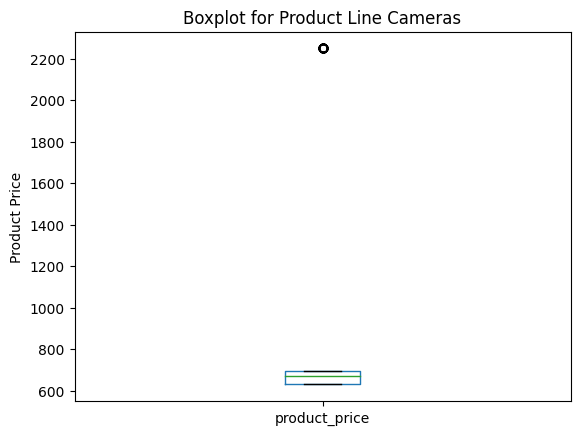

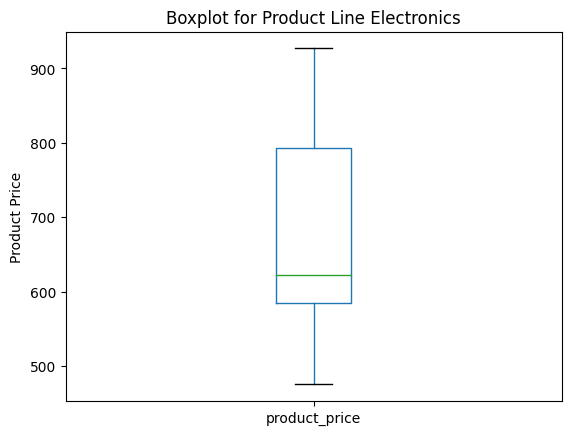

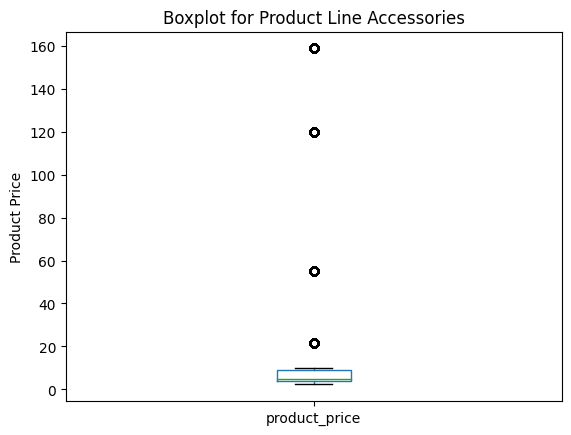

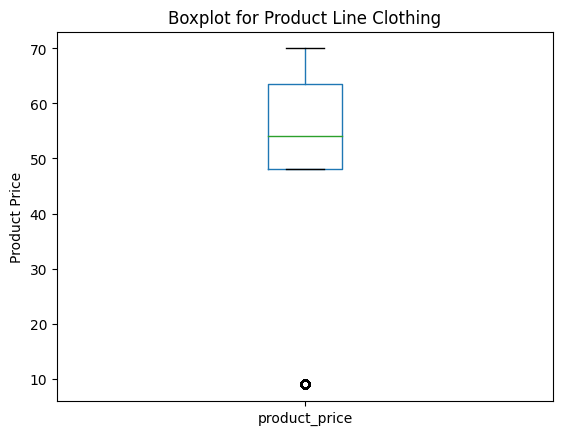

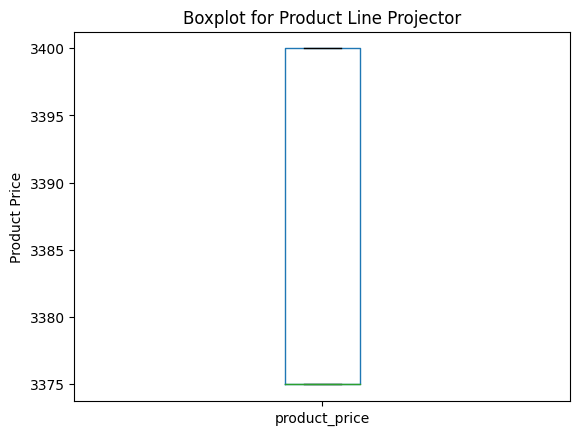

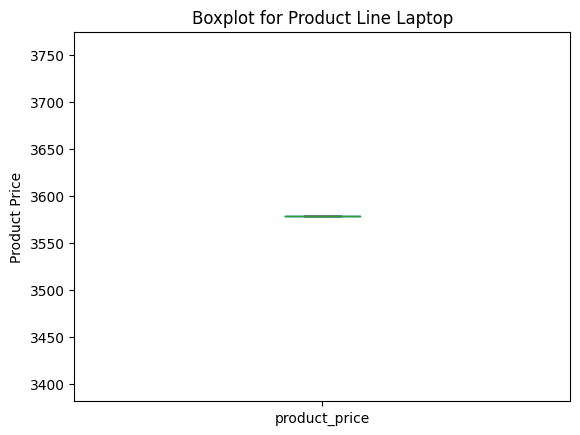

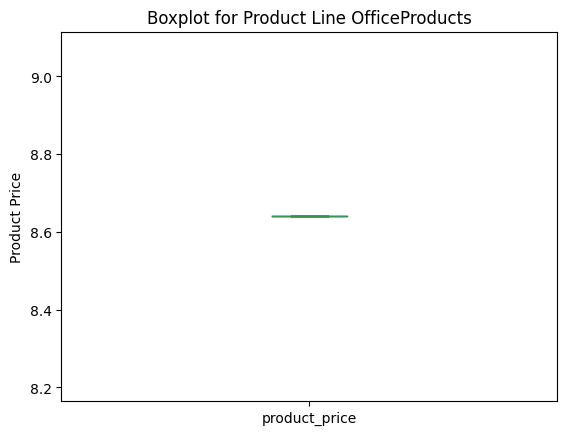

In [21]:
#boxplot
categories = df_price_cleaned['product_line'].unique()

# Plot boxplots for each category
for category in categories:
    plt.figure()  # Create a new figure for each category
    df_category = df_price_cleaned[df_price_cleaned['product_line'] == category]
    df_category.boxplot(column='product_price', grid=False)
    plt.title(f'Boxplot for Product Line {category}')
    plt.ylabel('Product Price')

plt.show()

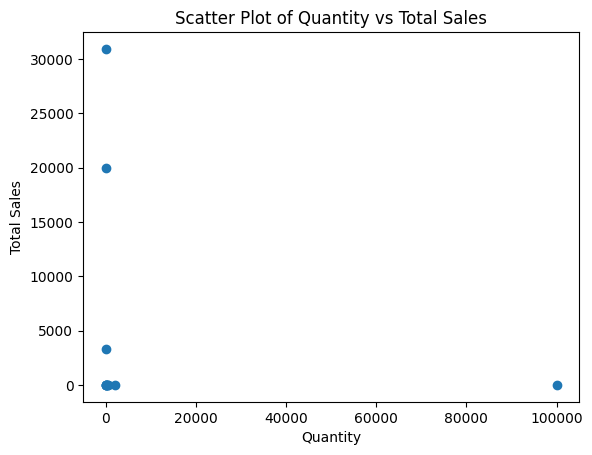

In [22]:
#scatter plot
sales_count = df_price_cleaned['quantity'].value_counts()

# Create scatter plot
plt.scatter(sales_count.index, sales_count.values)
plt.title('Scatter Plot of Quantity vs Total Sales')
plt.xlabel('Quantity')
plt.ylabel('Total Sales')
plt.show()

In [23]:
df_q_over_90k = df_price_cleaned[(df_price_cleaned['quantity'] > 90000)]

In [24]:
df_q_over_90k.head()

,order_id,order_date,order_year_month,customer_name,city,state_province,quantity,product_name,product_line,product_price,sales_revenue
33823,66829,2022-03-25,2022-03,Destiny Smith,New Hannahborough,INDIANA,100000.0,Water Bottle - 30 oz.,Accessories,4.99,499000.0


In [25]:
df_price_quantity_cleaned = df_price_cleaned[(df_price_cleaned['quantity'] < 100000)]

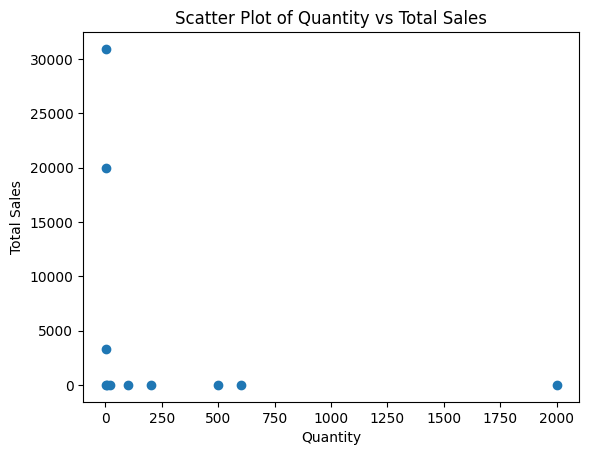

In [26]:
#scatter plot
sales_count = df_price_quantity_cleaned['quantity'].value_counts()

# Create scatter plot
plt.scatter(sales_count.index, sales_count.values)
plt.title('Scatter Plot of Quantity vs Total Sales')
plt.xlabel('Quantity')
plt.ylabel('Total Sales')
plt.show()

The 2,000 appears to be an outlier now, but this seems like a reasonable laptop price, so will leave this data point in.

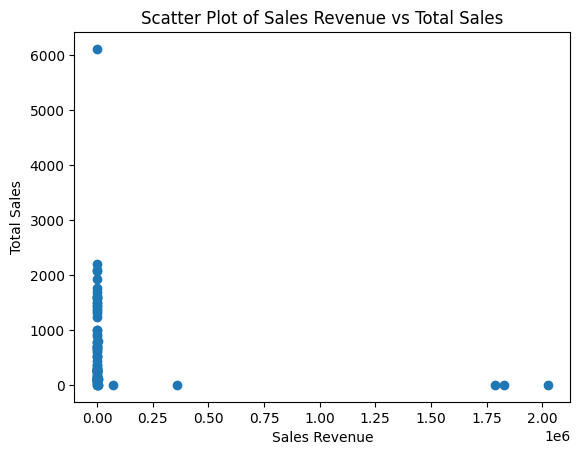

In [27]:
#scatter plot
sales_count = df_price_quantity_cleaned['sales_revenue'].value_counts()

# Create scatter plot
plt.scatter(sales_count.index, sales_count.values)
plt.title('Scatter Plot of Sales Revenue vs Total Sales')
plt.xlabel('Sales Revenue')
plt.ylabel('Total Sales')
plt.show()

In [28]:
df_price_quantity_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54173 entries, 0 to 56044
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          54173 non-null  int64  
 1   order_date        54173 non-null  object 
 2   order_year_month  54173 non-null  object 
 3   customer_name     54173 non-null  object 
 4   city              54173 non-null  object 
 5   state_province    54173 non-null  object 
 6   quantity          54173 non-null  float64
 7   product_name      54173 non-null  object 
 8   product_line      54173 non-null  object 
 9   product_price     54173 non-null  float64
 10  sales_revenue     54173 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 5.0+ MB


## Explore Relationships

➡️ Assignment Tasks
Your target variable is Total Sales (count of sales)
- How does the month of year affect sales?
- What are the best states for sales?
- What are the best and worst products for sales?

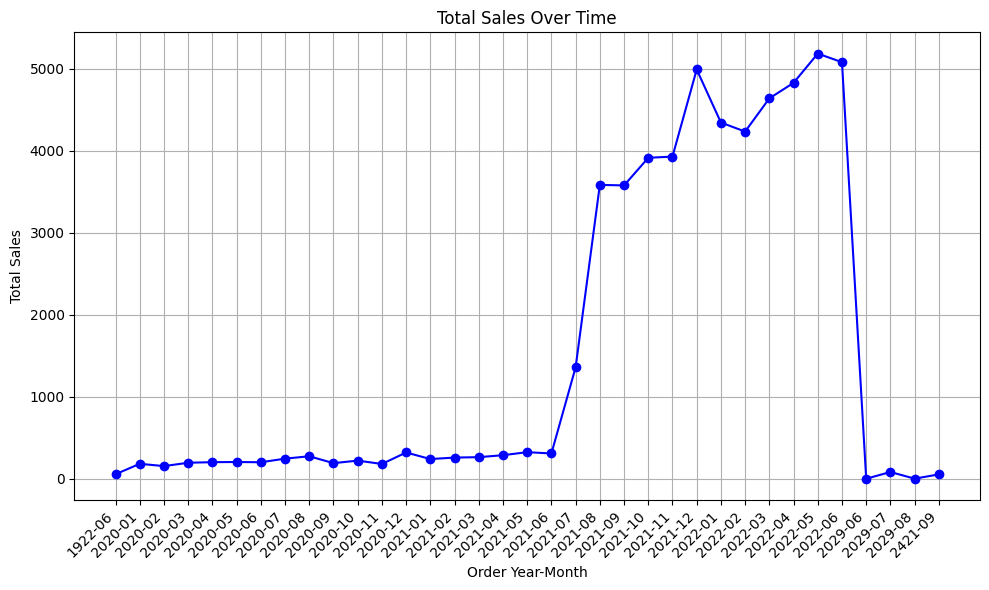

In [29]:
#sales by order year month
# Group by order_year_month and count the number of rows
sales_data = df_price_quantity_cleaned.groupby('order_year_month').size()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(sales_data.index, sales_data.values, marker='o', color='b', linestyle='-')

# Setting labels and title
plt.xlabel('Order Year-Month')
plt.ylabel('Total Sales')
plt.title('Total Sales Over Time')

# Formatting x-axis labels
plt.xticks(rotation=45, ha='right')

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [30]:
df_cleaned2 = df_price_quantity_cleaned[
    (df_price_quantity_cleaned['order_year_month'] != '2421-09') &
    (df_price_quantity_cleaned['order_year_month'] != '2029-08') &
    (df_price_quantity_cleaned['order_year_month'] != '2029-07') &
    (df_price_quantity_cleaned['order_year_month'] != '2029-06') &
    (df_price_quantity_cleaned['order_year_month'] != '1922-06')
]

Removing data outlier variables that occur way in the future or way in the past.

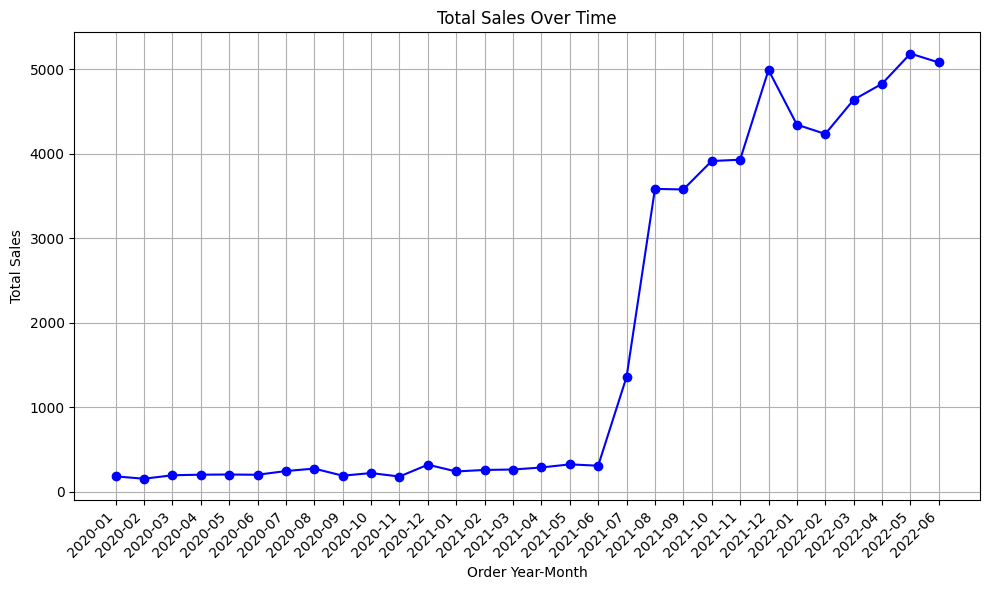

In [31]:
#sales by order year month
# Group by order_year_month and count the number of rows
sales_data = df_cleaned2.groupby('order_year_month').size()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(sales_data.index, sales_data.values, marker='o', color='b', linestyle='-')

# Setting labels and title
plt.xlabel('Order Year-Month')
plt.ylabel('Total Sales')
plt.title('Total Sales Over Time')

# Formatting x-axis labels
plt.xticks(rotation=45, ha='right')

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

The months between August 2021 and June 2022 saw the highest number of sales as compared to the overall data set. The peak month for sales was in May 2022 closely followed by June 2022 and December 2021. All of these values are around 5,000 total sales for those months.

In [32]:
#sales by state
sales_by_state = df_cleaned2.groupby('state_province').size()

sales_by_state_table = sales_by_state.reset_index()
sales_by_state_table.columns = ['state_province', 'Count']

sales_by_state_table = sales_by_state_table.sort_values(by='Count', ascending=False)

print(sales_by_state_table)

               state_province  Count
2   ARIZONA                     1315
25  MISSISSIPPI                 1175
47  UTAH                        1174
34  NORTH CAROLINA              1150
20  MARYLAND                    1147
19  MAINE                       1139
3   ARKANSAS                    1135
24  MINNESOTA                   1131
42  SOUTH CAROLINA              1131
6   COLORADO                    1124
21  MASSACHUSETTS               1120
50  WASHINGTON                  1116
7   CONNECTICUT                 1109
41  RHODE ISLAND                1109
51  WEST VIRGINIA               1106
10  GEORGIA                     1104
26  MISSOURI                    1102
39  OREGON                      1100
48  VERMONT                     1095
12  IDAHO                       1090
9   FLORIDA                     1077
8   DELAWARE                    1076
32  NEW MEXICO                  1076
43  SOUTH DAKOTA                1075
17  KENTUCKY                    1071
29  NEVADA                      1064
4

The top three states for sales are Arizona, Mississippi, and Utah.

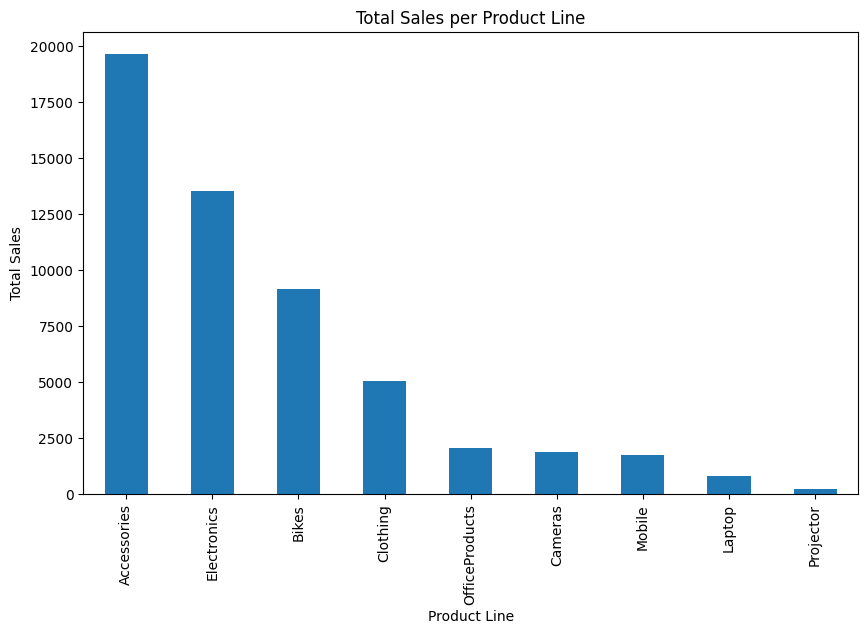

In [33]:
#sales by product

#count of product to find total number of sales
total_sales = df_cleaned2['product_line'].value_counts()

# Plotting
plt.figure(figsize=(10,6))
total_sales.plot(kind='bar')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.title('Total Sales per Product Line')
plt.show()

Accessories and electronics appear to sell the best out of all the product lines. Projectors and laptops appear to sell the worst out of all the product lines.

## Pair Plot

➡️ Assignment Tasks
- Create a pair plot showing any relevant variables, with the color determined by total sales

In [34]:
df_cleaned2['total_sales'] = len(df_cleaned2)

<ipython-input-34-a2c52fd7f4e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned2['total_sales'] = len(df_cleaned2)


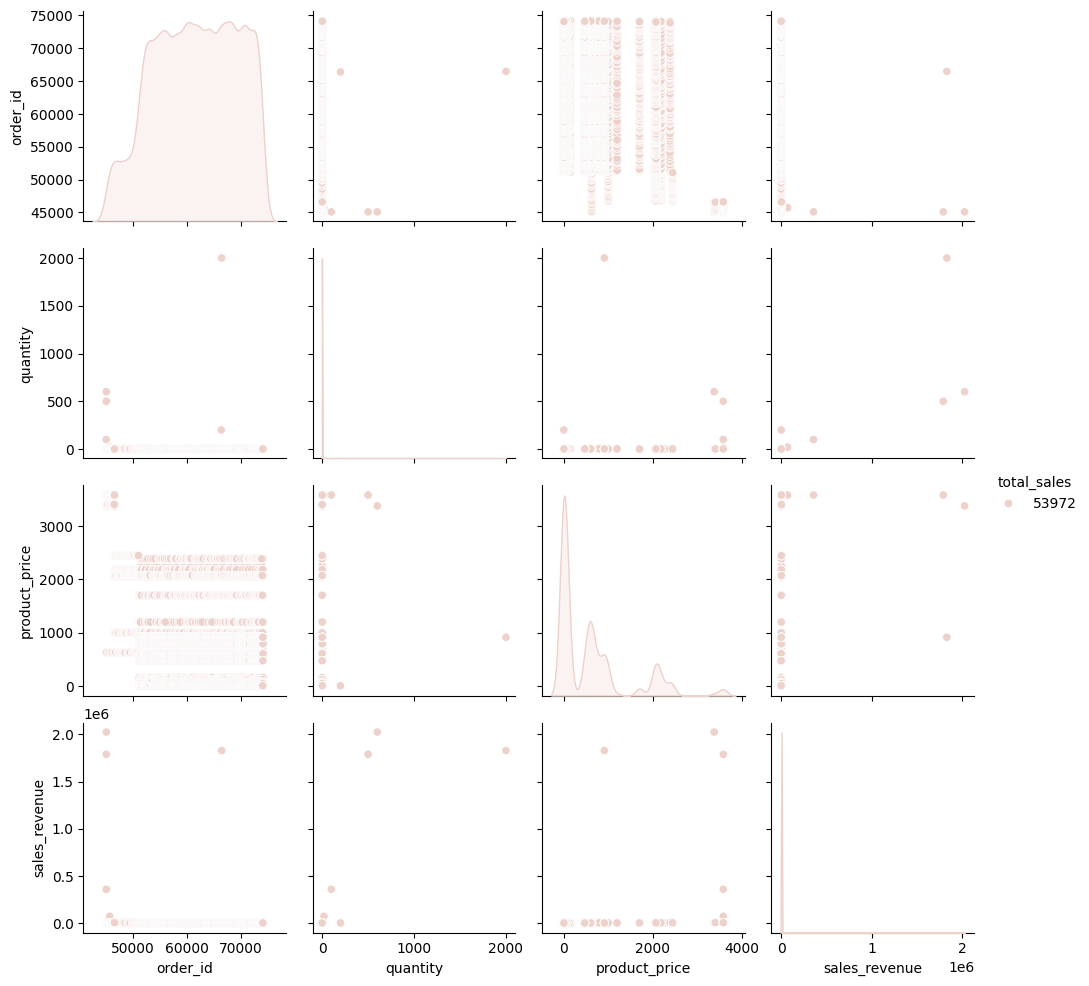

In [35]:
#pair plot
sns.pairplot(df_cleaned2, hue='total_sales')